<a href="https://colab.research.google.com/github/factorLee/DeepLearningfromScratch01_PKNU/blob/main/AI07_%EC%8B%A0%EA%B2%BD%EB%A7%9D03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 출력층

In [ ]:
# softmax
import numpy as np
a = np.array([0.3,2.9,4.0])
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [ ]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
print(np.sum(softmax(a)))

1.0


In [ ]:
# softmax 오버플로우 오류 처리방법 : a에서 제일 큰거 빼준다.
import numpy as np
a = np.array([0.3,2.9,4.0])
b = np.array([1100,1000,990])
def softmax(x):
    C = np.max(x)
    return np.exp(x-C)/np.sum(np.exp(x-C))
softmax1(b)

array([1.00000000e+00, 3.72007598e-44, 1.68891188e-48])

## 출력층을 Softmax로 변경한 인공신경망

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.2,0.3])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    #y = softmax(a3) # 분류 할때
    y = a3 # 회귀 할때

    return y

In [ ]:
network = init_network()
x = np.array([13.0,-100])
forward(network,x)

array([0.2698719 , 0.59472721])

## MNIST 데이터셋 불러오기

In [ ]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data() # x는 입력값에 사용 y는 정답
x_train=x_train/255.
x_test=x_test/255. # 픽셀이 0부터 255까지의 값을 가지고 있어서 -> 0~1사이의 값을 갖도록 표준화
x_train=x_train.reshape(60000,784) # 데이터의 자원이 60000x784로 재정렬
x_test=x_test.reshape(10000,784)


In [ ]:
print(x_train.shape) # 이번실습에서 사용
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


4


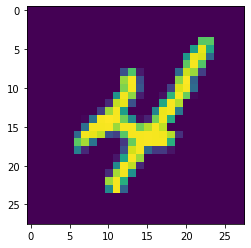

In [ ]:
import matplotlib.pyplot as plt

idx = 9
img = x_train[idx] # 0번째 데이터의 사진
label = y_train[idx] # 0번째 데이터의 실제 정답
img = img.reshape(28,28)
plt.imshow(img)
print(label)

## MNIST 처리 신경망 구성

In [ ]:
from keras.datasets import mnist

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def softmax(x):
    C = np.max(x)
    return np.exp(x-C)/np.sum(np.exp(x-C))

def get_data():
    (x_train, y_train),(x_test, y_test)=mnist.load_data() # x는 입력값에 사용 y는 정답
    x_train=x_train/255.
    x_test=x_test/255. # 픽셀이 0부터 255까지의 값을 가지고 있어서 -> 0~1사이의 값을 갖도록 표준화
    x_train=x_train.reshape(60000,784) # 데이터의 자원이 60000x784로 재정렬
    x_test=x_test.reshape(10000,784)
    return x_train, y_train

def init_network():
    network={}
    network['W1'] = np.random.normal(size=(784,50)) # 784by50 matrix 안의 값은 표준정규분포(평균이0이고 표준편차가1인)에 생성된 난수
    network['b1'] = np.random.normal(size=(50,))
    network['W2'] = np.random.normal(size=(50,100))
    network['b2'] = np.random.normal(size=(100,))
    network['W3'] = np.random.normal(size=(100,10))
    network['b3'] = np.random.normal(size=(10,))
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax1(a3)
    return y

A = np.array([[1.,2.],[3.,4.]])
print(A[1][0])
print(x_train[59999][783])

3.0
0.0


In [ ]:
network = init_network()
x_train,y_train=get_data()

In [ ]:
pred = predict(network, x_train[59999])
print(y_train[59999])
print(np.argmax(pred))
print(pred)

8
6
[1.32556126e-06 2.91014644e-02 1.73086885e-06 1.19299050e-04
 4.94276868e-05 6.95458552e-09 9.70672045e-01 8.31885932e-06
 5.16057118e-09 4.63768422e-05]


## 예측의 정확도 측정

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
accuracy_cut = 0
for i in range(len(x_train)):
    pred = predict(network, x_train[i])
    p = np.argmax(pred)
    if p == y_train[i]:
        accuracy_cut += 1

float(accuracy_cut)/len(x_train) 

0.1438

## 배치처리

In [ ]:
accuracy_cut = 0
batch_size = 100
for i in range(0,len(x_train),batch_size):
    x_batch = x_train[i:i+batch_size]
    pred = predict(network, x_batch)
    p = np.argmax(pred,axis=1)
    accuracy_cut += np.sum(p==y_train[i:i+batch_size])

float(accuracy_cut)/len(x_train)

0.1438